<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [3]:
#### Some explanation for code

# Since this part needs a long time to run, so there is many dump csv operation and read csv operation to reduce loss from sudden interrupt or dead kernel
# For the training part, I combine feature generation and EDA since I was using EDA to check if this feature is reasonable
# In feature generation, I use iloc instead of apply. One reason is the main time consume is not iloc but the function (ft9) itself.
# Also, since this is a real-world data. There may be some error when caculating certain features. 
# Using the iteration method can help me find which picture it is wrong and easily find the reason.

In [55]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [56]:
#Import anything you need here
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import skimage
from skimage import data
from skimage import io
import os
from PIL import Image
import matplotlib.colors as colors
from skimage.feature import hog


In [57]:
train_data = np.load('train_data.pkl', allow_pickle = True)
test_data = np.load('test_data.pkl', allow_pickle = True)
train_data

,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
...,...,...
59,"[[[159, 129, 105], [155, 125, 99], [152, 122, ...",19
60,"[[[162, 145, 115], [164, 145, 115], [165, 146,...",19
61,"[[[126, 155, 247], [126, 155, 247], [128, 157,...",19
62,"[[[10, 195, 0], [48, 255, 33], [21, 236, 44], ...",19


In [58]:
def ft0(image):
    return image.size
# Returns the pixel size of the image
def ft1(image):
    return np.mean(image[:,:,0])
# Returns the average of the red-channel pictures for the images
def ft2(image):
    return image.shape[0] / image.shape[1]
#Returns the aspect ratio of the image
def ft3(image):
    return np.mean(image[:,:,1])
# Returns the average of the green-channel pictures for the images
def ft4(image):
    return np.mean(image[:,:,2])
# Returns the average of the blue-channel pictures for the images
def ft5(image):
    return np.std(image[:,:,0])
# Returns the standard deviation of the red-channel pictures for the images
def ft6(image):
    return np.std(image[:,:,1])
# Returns the standard deviation of the green-channel pictures for the images
def ft7(image):
    return np.std(image[:,:,2])
# Returns the standard deviation of the blue-channel pictures for the images

def resize(image):
    return cv2.resize(image, (350,400))
# resize the image to a fix size

def ft8(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    return (dst>0.01 * dst.max()).sum() / dst.size
# Returns the proportion of corners under Harris detection

def ft9(image):   
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    m, n = image.shape
    img_ext = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_REPLICATE) # Add a 1 pixel border to the picture 
    b = 0.0
    for i in range(1,m+1):
        for j in range(1,n+1):
            # Caculate the square difference between each pixel and its neighbour
            b += ((img_ext[i,j]-img_ext[i,j+1])**2 + (img_ext[i,j]-img_ext[i,j-1])**2 + 
                    (img_ext[i,j]-img_ext[i+1,j])**2 + (img_ext[i,j]-img_ext[i-1,j])**2)
    cg = b/(4*(m-2)*(n-2)+3*(2*(m-2)+2*(n-2))+2*4) # divide by the total square count 
    return cg
# Returns the contrast of the picture


def ft10(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    m = dst.max()
    xdiv = int(image.shape[0] / 4)
    ydiv = int(image.shape[1] / 4)
    output = np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            x_left = xdiv * i
            x_right = xdiv * (i+1)
            y_left = ydiv * j
            y_right = ydiv * (j+1)
            part = dst[x_left:x_right,y_left:y_right]
            output[i][j] = (part> 0.01 * m).sum() * 16 / dst.size
    
    
    return output.flatten()
# Returns an 4*4 graph representing the corner proportion of each region in the image


def ft11(image):
    hist = cv2.calcHist([image], [0], None, [16], [0,255])
    return (hist / 255).flatten()
# Returns the histgrram of red channel

def ft12(image):
    hist = cv2.calcHist([image], [1], None, [16], [0,255])
    return (hist / 255).flatten()
# Returns the histgram of green channel

def ft13(image):
    hist = cv2.calcHist([image], [2], None, [16], [0,255])
    return (hist / 255).flatten()
# Returns the histgram of blue channel

def ft14(image):
    image = resize(image)
    normalised_blocks, hog_image = hog(image, orientations=5, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
    return normalised_blocks
# Returns the HOG map of the picture

 We expect all external sources sited, and significant indication of EDA. <br>


<h4> Graphs </h4>

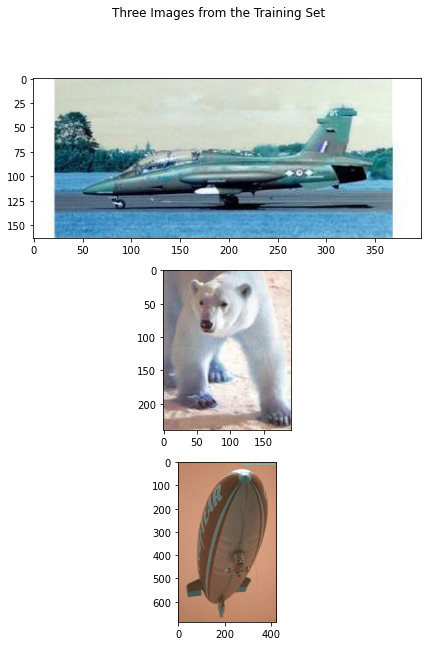

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
img_array = train_data.iloc[0]['Pictures']
cv2.imwrite('out_cv2.jpg',img_array)
img = io.imread('out_cv2.jpg')
plt.imshow(img)

plt.subplot(3,1,2)
img_array = train_data.iloc[100]['Pictures']
cv2.imwrite('out_cv2.jpg',img_array)
img = io.imread('out_cv2.jpg')
plt.imshow(img)

plt.subplot(3,1,3)
img_array = train_data.iloc[200]['Pictures']
cv2.imwrite('out_cv2.jpg',img_array)
img = io.imread('out_cv2.jpg')
plt.imshow(img)

plt.suptitle("Three Images from the Training Set")
plt.show()

In [33]:
train_num = len(train_data)
test_num = len(test_data)

In [34]:
train_features = pd.DataFrame()
train_features['Encoding'] = train_data['Encoding']

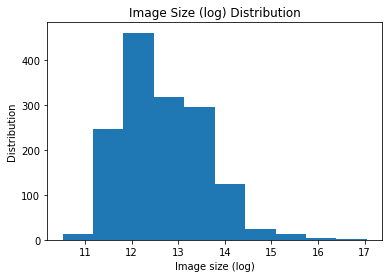

In [35]:


train_size = np.zeros((train_num,))
for i in range(train_num):
    img_array = train_data.iloc[i]['Pictures']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    train_size[i] = ft0(img)
    
train_features['size'] = train_size

plt.hist(list(np.log(train_size)))
plt.xlabel("Image size (log)")
plt.ylabel("Distribution")
plt.title("Image Size (log) Distribution")
plt.show()

Text(0, 0.5, 'Mean image size')

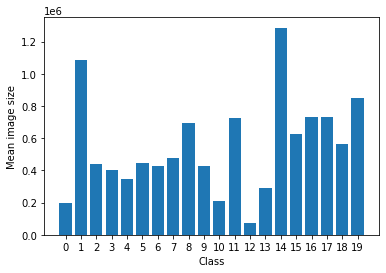

In [44]:
size_mean = train_features.groupby("Encoding")['size'].mean()
plt.bar(size_mean.index, size_mean.values)
plt.xticks(np.arange(20))
plt.xlabel("Class")
plt.ylabel("Mean image size")

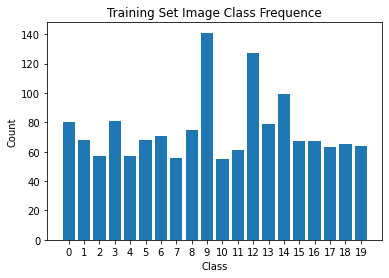

In [12]:
group_count = train_data.groupby("Encoding").size()
plt.bar(group_count.index, group_count.values)
plt.xticks(np.arange(20))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Set Image Class Frequence")
plt.show()

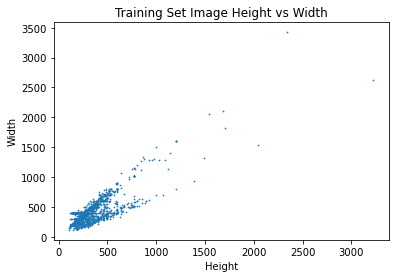

In [16]:
train_xdim = np.zeros((train_num,))
train_ydim = np.zeros((train_num,))
for i in range(train_num):
    img_array = train_data.iloc[i]['Pictures']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    train_xdim[i] = img.shape[0]
    train_ydim[i] = img.shape[1]

train_features['ratio'] = train_xdim[i] / train_ydim[i]

plt.scatter(train_xdim, train_ydim, s = 0.5)
plt.xlabel("Height")
plt.ylabel("Width")
plt.title("Training Set Image Height vs Width")
plt.show()

In [17]:
train_rm = np.zeros((train_num,))
train_gm = np.zeros((train_num,))
train_bm = np.zeros((train_num,))
train_rd = np.zeros((train_num,))
train_gd = np.zeros((train_num,))
train_bd = np.zeros((train_num,))
for i in range(train_num):
    img_array = train_data.iloc[i]['Pictures']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    train_rm[i] = ft1(img)
    train_gm[i] = ft3(img)
    train_bm[i] = ft4(img)
    train_rd[i] = ft5(img)
    train_gd[i] = ft6(img)
    train_bd[i] = ft7(img)
train_features['rm'] = train_rm
train_features['gm'] = train_gm
train_features['bm'] = train_bm
train_features['rd'] = train_rd
train_features['gd'] = train_gd
train_features['bd'] = train_bd

In [19]:
train_features

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd
0,0,195816.0,0.760638,149.271219,176.718271,183.441062,79.511281,64.007674,56.409146
1,0,221352.0,0.760638,164.942942,189.275548,210.716876,70.290595,74.452940,55.225426
2,0,194535.0,0.760638,111.901534,147.772072,170.099221,89.599499,68.004866,64.162562
3,0,200430.0,0.760638,78.183969,132.628140,152.172444,83.228097,62.691314,64.383826
4,0,208560.0,0.760638,86.430193,150.475129,147.341024,94.165948,71.328112,73.726628
...,...,...,...,...,...,...,...,...,...
59,19,396000.0,0.760638,75.473364,95.817795,114.687318,53.435160,58.080920,63.899266
60,19,1089906.0,0.760638,104.235614,121.608953,137.934627,48.952810,54.568847,61.924474
61,19,337500.0,0.760638,116.917671,116.306631,122.347742,72.332607,55.016800,53.973995
62,19,72468.0,0.760638,99.052699,119.275128,111.179541,58.643853,62.404724,64.023901


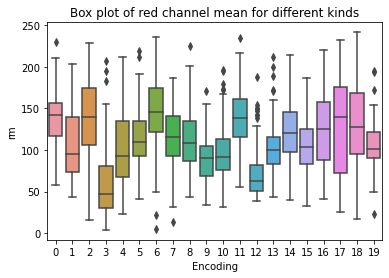

In [20]:
plt.title('Box plot of red channel mean for different kinds')
sns.boxplot(x = "Encoding", y = "rm", data = train_features)

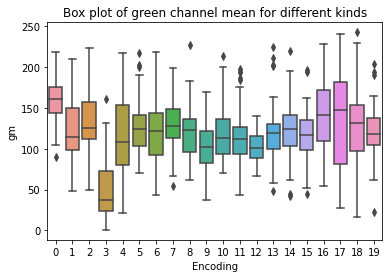

In [21]:
plt.title('Box plot of green channel mean for different kinds')
sns.boxplot(x = "Encoding", y = "gm", data = train_features)

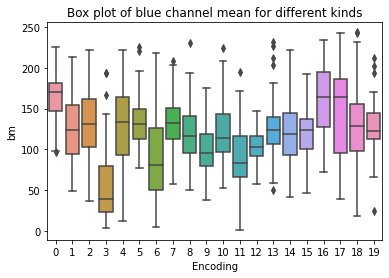

In [22]:
plt.title('Box plot of blue channel mean for different kinds')
sns.boxplot(x = "Encoding", y = "bm", data = train_features)

In [23]:
train_corner_rate = np.zeros((train_num,))
train_contrast = np.zeros((train_num,))
for i in range(train_num):
    img_array = train_data.iloc[i]['Pictures']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    train_corner_rate[i] = ft8(img)
train_features['corner_rate'] = train_corner_rate



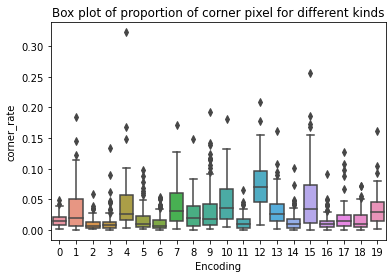

In [24]:
plt.title('Box plot of proportion of corner pixel for different kinds')
sns.boxplot(x = "Encoding", y = "corner_rate", data = train_features)

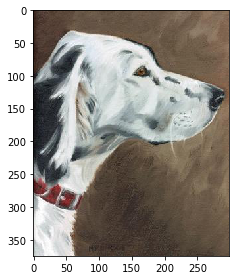

In [57]:
# A picture demonstration of how corner rates differ among different kinds
# Here shows the original dog image
filename = os.path.join('', 'd.jpg')
dog = io.imread(filename)
skimage.io.imshow(dog)


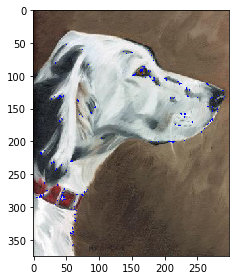

In [58]:
# Here we highlight the corner on the dog image
gray = cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst_dog = cv2.cornerHarris(gray,2,3,0.04)
dog[dst_dog>0.01*dst_dog.max()]=[0,0,255]
skimage.io.imshow(dog)

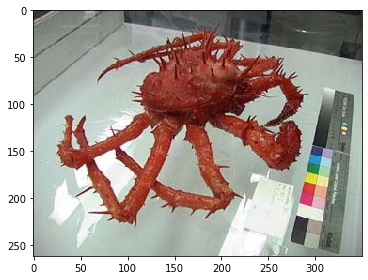

In [60]:
# Here shows the original crab image
plt.show()
filename2 = os.path.join('', 'c.jpg')
crab = io.imread(filename2)
skimage.io.imshow(cat)


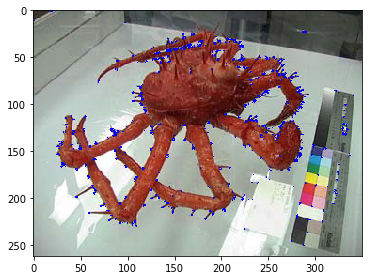

In [62]:
# Here we highlight the corner on the crab image
gray = cv2.cvtColor(crab,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst_crab = cv2.cornerHarris(gray,2,3,0.04)
crab[dst_crab>0.01*dst_crab.max()]=[0,0,255]
skimage.io.imshow(crab)
## By compare the corner image of crab and dog, we can see that there are significant more corners on crab image!

In [22]:
train_data['resize'] = train_data['Pictures'].apply(resize)
train_data

,Pictures,Encoding,resize
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0,"[[[174, 190, 187], [173, 189, 186], [172, 187,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...
59,"[[[159, 129, 105], [155, 125, 99], [152, 122, ...",19,"[[[159, 128, 104], [154, 124, 98], [152, 122, ..."
60,"[[[162, 145, 115], [164, 145, 115], [165, 146,...",19,"[[[163, 145, 115], [168, 147, 119], [170, 148,..."
61,"[[[126, 155, 247], [126, 155, 247], [128, 157,...",19,"[[[126, 155, 247], [126, 155, 247], [128, 157,..."
62,"[[[10, 195, 0], [48, 255, 33], [21, 236, 44], ...",19,"[[[10, 195, 0], [21, 212, 9], [41, 243, 26], [..."


In [31]:
# Need long time to finish!
for i in range(train_num):
    img_array = train_data.iloc[i]['resize']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    print(i)
    train_contrast[i] = ft9(img)
train_features['contrast'] = train_contrast

0


<ipython-input-5-298c4dc4ad8a>:45: RuntimeWarning: overflow encountered in ubyte_scalars
  b += ((img_ext[i,j]-img_ext[i,j+1])**2 + (img_ext[i,j]-img_ext[i,j-1])**2 +
<ipython-input-5-298c4dc4ad8a>:46: RuntimeWarning: overflow encountered in ubyte_scalars
  (img_ext[i,j]-img_ext[i+1,j])**2 + (img_ext[i,j]-img_ext[i-1,j])**2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


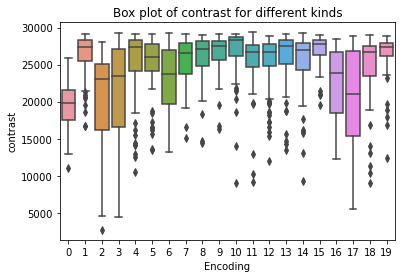

In [32]:
plt.title('Box plot of contrast for different kinds')
sns.boxplot(x = "Encoding", y = "contrast", data = train_features)

In [33]:
train_features.to_csv('train_scaler_features.csv')

In [59]:
train_features = pd.read_csv('train_scaler_features.csv')
train_features = train_features.drop(columns = ['Unnamed: 0'])
train_features

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,contrast
0,0,195816.0,0.760638,149.271219,176.718271,183.441062,79.511281,64.007674,56.409146,0.018844,20598.052770
1,0,221352.0,0.760638,164.942942,189.275548,210.716876,70.290595,74.452940,55.225426,0.009419,17458.645959
2,0,194535.0,0.760638,111.901534,147.772072,170.099221,89.599499,68.004866,64.162562,0.013740,20820.998106
3,0,200430.0,0.760638,78.183969,132.628140,152.172444,83.228097,62.691314,64.383826,0.028678,25291.051223
4,0,208560.0,0.760638,86.430193,150.475129,147.341024,94.165948,71.328112,73.726628,0.009983,23923.145887
...,...,...,...,...,...,...,...,...,...,...,...
1496,19,396000.0,0.760638,75.473364,95.817795,114.687318,53.435160,58.080920,63.899266,0.017803,27493.627943
1497,19,1089906.0,0.760638,104.235614,121.608953,137.934627,48.952810,54.568847,61.924474,0.019141,27465.510184
1498,19,337500.0,0.760638,116.917671,116.306631,122.347742,72.332607,55.016800,53.973995,0.014756,27656.700297
1499,19,72468.0,0.760638,99.052699,119.275128,111.179541,58.643853,62.404724,64.023901,0.161078,27232.330403


<h4> Sources </h4>
pixel intensity: https://homepages.inf.ed.ac.uk/rbf/HIPR2/histgram.htm<br>

harris-corners: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html<br>

SIFT: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html<br>

contrast: https://blog.csdn.net/weixin_45342712/article/details/96591834<br>

bag of words: https://github.com/bikz05/bag-of-words<br>

<h4> DataFrame Creation </h4>

In [60]:
def feature_frame(df, data):
    corner = []
    hr = []
    hg = []
    hb = []
    hog = []
    for i in range(len(data)):
        img_array = data.iloc[i]['Pictures']
        cv2.imwrite('out_cv2.jpg',img_array)
        img = io.imread('out_cv2.jpg')
        corner.append(ft10(img))
        hr.append(ft11(img))
        hg.append(ft12(img))
        hb.append(ft13(img))
        hog.append(ft14(img))
    df['corner'] = corner
    df['hr'] = hr
    df['hg'] = hg
    df['hb'] = hb
    df['hog'] = hog
    return df
    #Returns data-frame with all the features now inside, and calculated


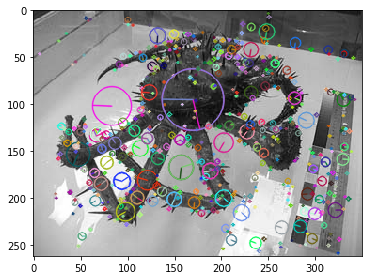

In [6]:
# A picture demonstration of sift
img = io.imread('c.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
skimage.io.imshow(img)


In [61]:
# Use the sift features and bag of words method to generate another kind of labels
from scipy.cluster.vq import kmeans, vq

codebook = None
k = 20

def generate_dict(train):
    global codebook
    global k
    pictures = train['Pictures']
    des_list = []
        
    sift = cv2.SIFT_create()
    
    for idx, img in enumerate(pictures):
        kp, des = sift.detectAndCompute(img, None)
        if len(kp) == 0:
            des = np.zeros((1, 128))
        des = np.float32(des)
        des_list.append(des)
    
    print('start vstack')
    descriptors = np.vstack(des_list)
    print(descriptors.shape)
    print('start kmeans')
    codebook, variance = kmeans(descriptors, k, 5)
    return des_list
    
def bag_of_word(df, des_list=None):
    global codebook
    global k
    im_features = np.zeros((df.shape[0], k))
    pictures = df['Pictures']
    if des_list is None:
        des_list = []    
        sift = cv2.SIFT_create()
    
        for idx, img in enumerate(pictures):
            kp, des = sift.detectAndCompute(img, None)
            if len(kp) == 0:
                des = np.zeros((1, 128))
            des = np.float32(des)
            des_list.append(des)
    else:
        pass
        
    for i in range(df.shape[0]):
        words, distance = vq(des_list[i], codebook)
        for w in words:
            im_features[i][w] += 1
            
        im_features[i] = im_features[i] / len(des_list[i])
    
    return pd.DataFrame(im_features)

In [62]:
desc_list = generate_dict(train_data)
train_sift_features = bag_of_word(train_data, desc_list)

start vstack
(1702555, 128)
start kmeans


In [63]:
train_sift_features.to_csv('train_sift_features.csv')
train_sift_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.026471,0.035294,0.050000,0.038235,0.026471,0.047059,0.014706,0.047059,0.114706,0.070588,0.017647,0.129412,0.020588,0.067647,0.011765,0.035294,0.035294,0.055882,0.135294,0.020588
1,0.024272,0.067961,0.043689,0.048544,0.004854,0.004854,0.048544,0.014563,0.072816,0.072816,0.029126,0.087379,0.014563,0.014563,0.082524,0.043689,0.043689,0.033981,0.179612,0.067961
2,0.029979,0.049251,0.049251,0.014989,0.021413,0.023555,0.008565,0.044968,0.162741,0.115632,0.025696,0.175589,0.019272,0.040685,0.017131,0.019272,0.012848,0.025696,0.104925,0.038544
3,0.041812,0.045296,0.040070,0.045296,0.031359,0.038328,0.031359,0.026132,0.092334,0.101045,0.038328,0.074913,0.033101,0.048780,0.041812,0.036585,0.033101,0.062718,0.069686,0.067944
4,0.035413,0.037099,0.026981,0.037099,0.025295,0.097808,0.018550,0.032040,0.099494,0.052277,0.020236,0.180438,0.035413,0.043845,0.015177,0.026981,0.021922,0.050590,0.109612,0.033727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.049796,0.030204,0.043265,0.022857,0.038367,0.055510,0.053061,0.059592,0.031020,0.013878,0.042449,0.042449,0.050612,0.128163,0.052245,0.070204,0.061224,0.052245,0.038367,0.064490
1497,0.033218,0.034948,0.031142,0.021799,0.051903,0.046021,0.027336,0.099654,0.063668,0.035294,0.059516,0.052595,0.059516,0.123875,0.022837,0.039100,0.049827,0.034948,0.062284,0.050519
1498,0.025102,0.033275,0.031524,0.038529,0.039113,0.058377,0.072971,0.096322,0.068885,0.037361,0.038529,0.043783,0.035026,0.071220,0.043783,0.072971,0.044367,0.019848,0.052539,0.076474
1499,0.043689,0.029126,0.029126,0.033981,0.033981,0.053398,0.053398,0.135922,0.043689,0.063107,0.029126,0.043689,0.058252,0.019417,0.048544,0.063107,0.038835,0.087379,0.019417,0.072816


In [64]:
train_sift_features = pd.read_csv('train_sift_features.csv')
train_sift_features = train_sift_features.drop(columns = ['Unnamed: 0'])
train_sift_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.026471,0.035294,0.050000,0.038235,0.026471,0.047059,0.014706,0.047059,0.114706,0.070588,0.017647,0.129412,0.020588,0.067647,0.011765,0.035294,0.035294,0.055882,0.135294,0.020588
1,0.024272,0.067961,0.043689,0.048544,0.004854,0.004854,0.048544,0.014563,0.072816,0.072816,0.029126,0.087379,0.014563,0.014563,0.082524,0.043689,0.043689,0.033981,0.179612,0.067961
2,0.029979,0.049251,0.049251,0.014989,0.021413,0.023555,0.008565,0.044968,0.162741,0.115632,0.025696,0.175589,0.019272,0.040685,0.017131,0.019272,0.012848,0.025696,0.104925,0.038544
3,0.041812,0.045296,0.040070,0.045296,0.031359,0.038328,0.031359,0.026132,0.092334,0.101045,0.038328,0.074913,0.033101,0.048780,0.041812,0.036585,0.033101,0.062718,0.069686,0.067944
4,0.035413,0.037099,0.026981,0.037099,0.025295,0.097808,0.018550,0.032040,0.099494,0.052277,0.020236,0.180438,0.035413,0.043845,0.015177,0.026981,0.021922,0.050590,0.109612,0.033727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.049796,0.030204,0.043265,0.022857,0.038367,0.055510,0.053061,0.059592,0.031020,0.013878,0.042449,0.042449,0.050612,0.128163,0.052245,0.070204,0.061224,0.052245,0.038367,0.064490
1497,0.033218,0.034948,0.031142,0.021799,0.051903,0.046021,0.027336,0.099654,0.063668,0.035294,0.059516,0.052595,0.059516,0.123875,0.022837,0.039100,0.049827,0.034948,0.062284,0.050519
1498,0.025102,0.033275,0.031524,0.038529,0.039113,0.058377,0.072971,0.096322,0.068885,0.037361,0.038529,0.043783,0.035026,0.071220,0.043783,0.072971,0.044367,0.019848,0.052539,0.076474
1499,0.043689,0.029126,0.029126,0.033981,0.033981,0.053398,0.053398,0.135922,0.043689,0.063107,0.029126,0.043689,0.058252,0.019417,0.048544,0.063107,0.038835,0.087379,0.019417,0.072816


In [65]:
train_features = feature_frame(train_features, train_data)

In [66]:
train_features

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,contrast,corner,hr,hg,hb,hog
0,0,195816.0,0.760638,149.271219,176.718271,183.441062,79.511281,64.007674,56.409146,0.018844,20598.052770,"[0.004902561588429955, 0.0, 0.0, 0.01029537933...","[13.764706, 6.3686275, 5.745098, 9.505882, 23....","[6.4235296, 2.5333333, 3.1686275, 4.545098, 5....","[3.0235295, 3.619608, 2.5254903, 3.3215687, 5....","[0.17010403212471692, 0.0, 0.0, 0.0, 0.0, 0.65..."
1,0,221352.0,0.760638,164.942942,189.275548,210.716876,70.290595,74.452940,55.225426,0.009419,17458.645959,"[0.0006505475441830207, 0.0, 0.0, 0.0, 0.00585...","[30.458824, 5.1764708, 2.6, 2.2901962, 2.16078...","[25.231373, 6.3333335, 3.4039216, 2.109804, 1....","[0.007843138, 1.8745098, 10.6470585, 4.0313725...","[0.4043520531710271, 0.0, 0.0, 0.0, 0.0, 0.589..."
2,0,194535.0,0.760638,111.901534,147.772072,170.099221,89.599499,68.004866,64.162562,0.013740,20820.998106,"[0.0017271956203253913, 0.0004934844629501118,...","[38.866665, 19.713726, 26.172548, 24.380392, 1...","[11.760784, 3.9882352, 4.1725492, 4.5333333, 5...","[0.46666667, 4.5607843, 3.9294116, 4.937255, 4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.678973958723614, 0..."
3,0,200430.0,0.760638,78.183969,132.628140,152.172444,83.228097,62.691314,64.383826,0.028678,25291.051223,"[0.0057476425684777725, 0.02155365963179165, 0...","[64.411766, 47.635296, 32.384315, 14.6, 12.250...","[6.027451, 7.752941, 8.203921, 10.662745, 12.3...","[1.5803921, 4.7058825, 7.1607842, 8.07451, 10....","[0.30636490194118593, 0.01352002943571938, 0.0..."
4,0,208560.0,0.760638,86.430193,150.475129,147.341024,94.165948,71.328112,73.726628,0.009983,23923.145887,"[0.012428078250863062, 0.026006904487917145, 0...","[75.96863, 42.564705, 25.341177, 19.333334, 15...","[8.8, 7.9764705, 10.0, 13.890196, 10.388235, 9...","[9.207843, 10.627451, 13.619608, 11.2, 9.31372...","[0.09926114756538132, 0.004010755962892532, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,19,396000.0,0.760638,75.473364,95.817795,114.687318,53.435160,58.080920,63.899266,0.017803,27493.627943,"[0.003515151515151515, 0.025696969696969697, 0...","[73.854904, 44.4, 42.282352, 53.7451, 62.65098...","[64.23529, 44.686275, 25.239216, 21.207844, 27...","[42.67059, 46.035294, 34.509804, 19.792156, 14...","[0.3173113733615134, 0.25776471215600616, 0.13..."
1497,19,1089906.0,0.760638,104.235614,121.608953,137.934627,48.952810,54.568847,61.924474,0.019141,27465.510184,"[0.0, 0.005284859428244271, 0.0169115501703816...","[10.301961, 149.41176, 109.97647, 66.745094, 7...","[22.235294, 169.35294, 67.329414, 40.30588, 41...","[13.439216, 146.6706, 80.6549, 39.509804, 38.0...","[0.2732375505725813, 0.17033715126596002, 0.08..."
1498,19,337500.0,0.760638,116.917671,116.306631,122.347742,72.332607,55.016800,53.973995,0.014756,27656.700297,"[0.03128888888888889, 0.005546666666666667, 0....","[23.047058, 20.37255, 23.780392, 30.968628, 45...","[23.831373, 16.25098, 13.57647, 18.545097, 34....","[21.333334, 13.878431, 11.368628, 12.768627, 2...","[0.28751721959947674, 0.15658573034663908, 0.1..."
1499,19,72468.0,0.760638,99.052699,119.275128,111.179541,58.643853,62.404724,64.023901,0.161078,27232.330403,"[0.07617155158138765, 0.10266600430534857, 0.2...","[6.32549, 4.909804, 6.670588, 8.819608, 11.160...","[4.5529413, 2.9215686, 4.3215685, 5.8705883, 9...","[6.2078433, 4.6431375, 6.1647058, 6.9843135, 8...","[0.40580831553591323, 0.10991087502017821, 0.1..."


In [67]:
train_features_full = pd.concat([train_features, train_sift_features], axis=1)
train_features_full

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,...,10,11,12,13,14,15,16,17,18,19
0,0,195816.0,0.760638,149.271219,176.718271,183.441062,79.511281,64.007674,56.409146,0.018844,...,0.017647,0.129412,0.020588,0.067647,0.011765,0.035294,0.035294,0.055882,0.135294,0.020588
1,0,221352.0,0.760638,164.942942,189.275548,210.716876,70.290595,74.452940,55.225426,0.009419,...,0.029126,0.087379,0.014563,0.014563,0.082524,0.043689,0.043689,0.033981,0.179612,0.067961
2,0,194535.0,0.760638,111.901534,147.772072,170.099221,89.599499,68.004866,64.162562,0.013740,...,0.025696,0.175589,0.019272,0.040685,0.017131,0.019272,0.012848,0.025696,0.104925,0.038544
3,0,200430.0,0.760638,78.183969,132.628140,152.172444,83.228097,62.691314,64.383826,0.028678,...,0.038328,0.074913,0.033101,0.048780,0.041812,0.036585,0.033101,0.062718,0.069686,0.067944
4,0,208560.0,0.760638,86.430193,150.475129,147.341024,94.165948,71.328112,73.726628,0.009983,...,0.020236,0.180438,0.035413,0.043845,0.015177,0.026981,0.021922,0.050590,0.109612,0.033727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,19,396000.0,0.760638,75.473364,95.817795,114.687318,53.435160,58.080920,63.899266,0.017803,...,0.042449,0.042449,0.050612,0.128163,0.052245,0.070204,0.061224,0.052245,0.038367,0.064490
1497,19,1089906.0,0.760638,104.235614,121.608953,137.934627,48.952810,54.568847,61.924474,0.019141,...,0.059516,0.052595,0.059516,0.123875,0.022837,0.039100,0.049827,0.034948,0.062284,0.050519
1498,19,337500.0,0.760638,116.917671,116.306631,122.347742,72.332607,55.016800,53.973995,0.014756,...,0.038529,0.043783,0.035026,0.071220,0.043783,0.072971,0.044367,0.019848,0.052539,0.076474
1499,19,72468.0,0.760638,99.052699,119.275128,111.179541,58.643853,62.404724,64.023901,0.161078,...,0.029126,0.043689,0.058252,0.019417,0.048544,0.063107,0.038835,0.087379,0.019417,0.072816


In [68]:
train_features_full.to_csv('train_features_full.csv')

In [70]:
%store train_features_full

Stored 'train_features_full' (DataFrame)


In [13]:
# Also do the same thing for test set
test_features = pd.DataFrame()
test_features['Encoding'] = test_data['Encoding']


In [19]:
test_size = np.zeros((test_num,))
test_ratio = np.zeros((test_num,))
test_rm = np.zeros((test_num,))
test_gm = np.zeros((test_num,))
test_bm = np.zeros((test_num,))
test_rd = np.zeros((test_num,))
test_gd = np.zeros((test_num,))
test_bd = np.zeros((test_num,))
test_corner_rate = np.zeros((test_num,))
test_contrast = np.zeros((test_num,))

test_data['resize'] = test_data['Pictures'].apply(resize)
test_data

,Pictures,Encoding,resize
0,"[[[80, 79, 74], [56, 55, 50], [54, 53, 48], [4...",-1,"[[[63, 62, 57], [44, 43, 39], [39, 40, 28], [5..."
1,"[[[10, 15, 19], [10, 15, 19], [11, 16, 19], [1...",-1,"[[[10, 15, 19], [10, 15, 19], [10, 15, 19], [1..."
2,"[[[232, 231, 247], [250, 249, 255], [235, 234,...",-1,"[[[232, 231, 247], [246, 245, 253], [240, 239,..."
3,"[[[97, 75, 77], [98, 76, 78], [99, 77, 79], [1...",-1,"[[[97, 75, 77], [97, 75, 77], [98, 76, 78], [9..."
4,"[[[19, 46, 55], [19, 46, 53], [20, 47, 54], [2...",-1,"[[[19, 46, 55], [19, 46, 54], [19, 46, 53], [2..."
...,...,...,...
711,"[[[64, 70, 84], [64, 70, 82], [65, 72, 82], [6...",-1,"[[[64, 70, 82], [64, 70, 82], [62, 68, 82], [6..."
712,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",-1,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
713,"[[[127, 178, 241], [124, 176, 236], [124, 176,...",-1,"[[[127, 178, 241], [125, 176, 237], [124, 176,..."
714,"[[[71, 97, 122], [70, 91, 118], [66, 86, 113],...",-1,"[[[71, 94, 120], [65, 85, 112], [61, 78, 108],..."


In [20]:
for i in range(test_num):
    img_array = test_data.iloc[i]['Pictures']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    test_size[i] = ft0(img)
    test_ratio[i] = ft2(img)
    test_rm[i] = ft1(img)
    test_gm[i] = ft3(img)
    test_bm[i] = ft4(img)
    test_rd[i] = ft5(img)
    test_gd[i] = ft6(img)
    test_bd[i] = ft7(img)
    test_corner_rate[i] = ft8(img)
    print(i)
    img_array = test_data.iloc[i]['resize']
    cv2.imwrite('out_cv2.jpg',img_array)
    img = io.imread('out_cv2.jpg')
    test_contrast[i] = ft9(img)
    
test_features['size'] = test_size
test_features['ratio'] = test_ratio
test_features['rm'] = test_rm
test_features['gm'] = test_gm
test_features['bm'] = test_bm
test_features['rd'] = test_rd
test_features['gd'] = test_gd
test_features['bd'] = test_bd
test_features['corner_rate'] = test_corner_rate
test_features['contrast'] = test_contrast

0


<ipython-input-11-298c4dc4ad8a>:45: RuntimeWarning: overflow encountered in ubyte_scalars
  b += ((img_ext[i,j]-img_ext[i,j+1])**2 + (img_ext[i,j]-img_ext[i,j-1])**2 +
<ipython-input-11-298c4dc4ad8a>:46: RuntimeWarning: overflow encountered in ubyte_scalars
  (img_ext[i,j]-img_ext[i+1,j])**2 + (img_ext[i,j]-img_ext[i-1,j])**2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [21]:
test_features

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,contrast
0,-1,1620000.0,0.666667,105.558970,106.876167,105.925409,63.118244,65.353151,67.308998,0.022939,28192.941468
1,-1,91821.0,0.526971,133.939426,147.563237,144.826478,76.766596,77.300304,79.839983,0.144183,26550.664494
2,-1,312006.0,1.171141,118.651949,123.825542,133.571393,82.190904,72.808358,68.585112,0.026048,23938.792294
3,-1,70308.0,0.656085,85.566735,83.704130,96.633470,48.439898,52.485363,61.887718,0.004438,21951.027047
4,-1,244650.0,1.502146,46.820000,40.627652,23.175156,34.211603,28.885951,25.861795,0.002612,26105.672036
...,...,...,...,...,...,...,...,...,...,...,...
711,-1,1229580.0,0.624691,138.483172,88.688035,82.409435,46.178873,34.181486,33.410329,0.006427,27533.776365
712,-1,490032.0,0.658635,163.278553,128.315543,101.540050,65.378796,70.031171,66.900228,0.000943,25046.653085
713,-1,185115.0,0.749129,162.880415,126.218329,96.150053,72.482014,59.430975,53.221593,0.008006,27389.875402
714,-1,842688.0,0.714514,131.551439,108.076957,86.505643,47.628833,43.845392,43.261810,0.001299,28363.330349


In [23]:
test_features.to_csv('test_scaler_features.csv')

In [71]:
test_features = pd.read_csv('test_scaler_features.csv')
test_features = test_features.drop(columns = ['Unnamed: 0'])
test_features

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,contrast
0,-1,1620000.0,0.666667,105.558970,106.876167,105.925409,63.118244,65.353151,67.308998,0.022939,28192.941468
1,-1,91821.0,0.526971,133.939426,147.563237,144.826478,76.766596,77.300304,79.839983,0.144183,26550.664494
2,-1,312006.0,1.171141,118.651949,123.825542,133.571393,82.190904,72.808358,68.585112,0.026048,23938.792294
3,-1,70308.0,0.656085,85.566735,83.704130,96.633470,48.439898,52.485363,61.887718,0.004438,21951.027047
4,-1,244650.0,1.502146,46.820000,40.627652,23.175156,34.211603,28.885951,25.861795,0.002612,26105.672036
...,...,...,...,...,...,...,...,...,...,...,...
711,-1,1229580.0,0.624691,138.483172,88.688035,82.409435,46.178873,34.181486,33.410329,0.006427,27533.776365
712,-1,490032.0,0.658635,163.278553,128.315543,101.540050,65.378796,70.031171,66.900228,0.000943,25046.653085
713,-1,185115.0,0.749129,162.880415,126.218329,96.150053,72.482014,59.430975,53.221593,0.008006,27389.875402
714,-1,842688.0,0.714514,131.551439,108.076957,86.505643,47.628833,43.845392,43.261810,0.001299,28363.330349


In [72]:
test_features = feature_frame(test_features, test_data)
test_features

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,contrast,corner,hr,hg,hb,hog
0,-1,1620000.0,0.666667,105.558970,106.876167,105.925409,63.118244,65.353151,67.308998,0.022939,28192.941468,"[0.026548148148148147, 0.030874074074074075, 0...","[19.588236, 206.8902, 235.93726, 197.92549, 25...","[48.796078, 238.0, 158.8353, 198.44313, 277.74...","[119.96863, 201.83922, 151.30588, 219.6902, 25...","[0.30399808533048384, 0.13068773390092972, 0.1..."
1,-1,91821.0,0.526971,133.939426,147.563237,144.826478,76.766596,77.300304,79.839983,0.144183,26550.664494,"[0.06639004149377593, 0.05384389192014898, 0.0...","[3.9960785, 11.239216, 8.407844, 7.0235295, 6....","[2.0196078, 9.219608, 7.709804, 6.090196, 5.52...","[5.7568626, 8.882353, 6.6313725, 5.3411765, 5....","[0.30087663987411073, 0.03644700713432472, 0.0..."
2,-1,312006.0,1.171141,118.651949,123.825542,133.571393,82.190904,72.808358,68.585112,0.026048,23938.792294,"[0.0004615295859695006, 0.0015384319532316686,...","[39.835293, 24.227451, 29.44706, 28.42745, 35....","[29.631372, 20.333334, 28.713726, 20.882353, 2...","[15.898039, 19.215687, 25.054901, 25.34902, 17...","[0.3554542638507929, 0.23466774809023724, 0.35..."
3,-1,70308.0,0.656085,85.566735,83.704130,96.633470,48.439898,52.485363,61.887718,0.004438,21951.027047,"[0.0, 0.019798600443761735, 0.0129714968424645...","[3.4862745, 15.466666, 11.6, 5.0784316, 3.6039...","[4.0745096, 20.760784, 8.729412, 3.3294117, 3....","[5.9058824, 17.44706, 8.360785, 3.4431372, 2.6...","[0.2052470397854737, 0.23083780896755401, 0.19..."
4,-1,244650.0,1.502146,46.820000,40.627652,23.175156,34.211603,28.885951,25.861795,0.002612,26105.672036,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.001765787860208461...","[20.8, 102.937256, 74.984314, 57.513725, 28.80...","[12.227451, 136.20392, 84.18431, 48.662746, 19...","[155.26274, 100.43922, 39.94902, 9.52549, 3.22...","[0.01701314829014245, 0.053973092707984005, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1,1229580.0,0.624691,138.483172,88.688035,82.409435,46.178873,34.181486,33.410329,0.006427,27533.776365,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.00480163958424828,...","[28.309803, 14.015686, 22.011765, 35.74902, 51...","[42.50196, 25.27843, 81.32157, 161.8353, 274.7...","[38.1451, 41.337254, 110.278435, 216.0549, 329...","[0.3023086829003882, 0.19330153368714514, 0.11..."
712,-1,490032.0,0.658635,163.278553,128.315543,101.540050,65.378796,70.031171,66.900228,0.000943,25046.653085,"[9.795278675678323e-05, 0.0005877167205406994,...","[19.368628, 12.882353, 21.835295, 21.145098, 1...","[24.494118, 20.980392, 23.662745, 17.603922, 5...","[13.211764, 30.07451, 47.07843, 109.752945, 14...","[0.03488198459060016, 0.14233921127812893, 0.0..."
713,-1,185115.0,0.749129,162.880415,126.218329,96.150053,72.482014,59.430975,53.221593,0.008006,27389.875402,"[0.015039299894660076, 0.0007778948221375901, ...","[5.105882, 6.937255, 4.2588234, 24.462746, 12....","[11.027451, 3.4509804, 20.066668, 16.745098, 8...","[13.796079, 23.92549, 14.984314, 9.529411, 13....","[0.21290238940718068, 0.16434992213342056, 0.3..."
714,-1,842688.0,0.714514,131.551439,108.076957,86.505643,47.628833,43.845392,43.261810,0.001299,28363.330349,"[0.0, 0.0, 0.0, 0.000227842333105491, 0.0, 0.0...","[24.411764, 32.42353, 19.188236, 34.035294, 55...","[41.152943, 28.329412, 41.560783, 74.23529, 99...","[72.02353, 64.9451, 93.666664, 111.15686, 123....","[0.22130777628535764, 0.30276055322168954, 0.3..."


In [73]:
codebook

array([[21.397537 , 17.381737 , 19.214977 , ..., 15.921095 , 16.836292 ,
        20.360134 ],
       [34.538666 , 42.894924 , 31.24209  , ...,  8.454153 , 11.040725 ,
        17.317556 ],
       [21.9414   , 19.248856 , 19.52875  , ..., 16.356892 , 16.869987 ,
        20.70074  ],
       ...,
       [35.57678  , 52.57008  , 38.35833  , ..., 10.371713 ,  7.5289674,
        12.641468 ],
       [63.722492 , 34.37096  , 12.761138 , ...,  9.3399315,  8.109332 ,
        11.169856 ],
       [20.889542 , 39.040474 , 51.341877 , ..., 23.073465 , 30.71758  ,
        29.87533  ]], dtype=float32)

In [74]:
test_sift_features = bag_of_word(test_data, None)
test_sift_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.045832,0.055905,0.052883,0.043314,0.054898,0.044321,0.039285,0.042055,0.069504,0.048099,0.054394,0.047847,0.052128,0.040796,0.046336,0.040292,0.054143,0.046084,0.064719,0.057164
1,0.049180,0.049180,0.049180,0.028689,0.045082,0.030738,0.065574,0.032787,0.036885,0.024590,0.075820,0.055328,0.051230,0.028689,0.030738,0.073770,0.051230,0.053279,0.073770,0.094262
2,0.057353,0.063235,0.073529,0.038235,0.047059,0.044118,0.026471,0.017647,0.050000,0.038235,0.041176,0.047059,0.054412,0.023529,0.042647,0.063235,0.057353,0.054412,0.072059,0.088235
3,0.041667,0.013889,0.041667,0.083333,0.027778,0.069444,0.041667,0.013889,0.041667,0.013889,0.013889,0.277778,0.000000,0.000000,0.027778,0.000000,0.013889,0.027778,0.222222,0.027778
4,0.015936,0.075697,0.043825,0.047809,0.103586,0.047809,0.107570,0.023904,0.003984,0.027888,0.027888,0.075697,0.131474,0.031873,0.071713,0.023904,0.039841,0.023904,0.055777,0.019920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,0.016352,0.010063,0.014465,0.024528,0.059748,0.061006,0.020126,0.087421,0.120126,0.074214,0.027044,0.042138,0.061006,0.239623,0.023899,0.010063,0.028931,0.023270,0.047170,0.008805
712,0.052288,0.055556,0.058824,0.065359,0.032680,0.049020,0.019608,0.022876,0.084967,0.029412,0.016340,0.196078,0.042484,0.039216,0.035948,0.006536,0.009804,0.035948,0.124183,0.022876
713,0.034091,0.045455,0.034091,0.030303,0.018939,0.015152,0.007576,0.034091,0.094697,0.034091,0.018939,0.238636,0.034091,0.068182,0.007576,0.022727,0.030303,0.022727,0.189394,0.018939
714,0.008045,0.009901,0.007426,0.020421,0.043936,0.073639,0.006807,0.139851,0.126856,0.105817,0.031559,0.043317,0.044554,0.209158,0.008663,0.001238,0.024752,0.008663,0.078589,0.006807


In [75]:
test_sift_features.to_csv('test_sift_features.csv')

In [76]:
test_features_full = pd.concat([test_features, test_sift_features], axis=1)
test_features_full

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,...,10,11,12,13,14,15,16,17,18,19
0,-1,1620000.0,0.666667,105.558970,106.876167,105.925409,63.118244,65.353151,67.308998,0.022939,...,0.054394,0.047847,0.052128,0.040796,0.046336,0.040292,0.054143,0.046084,0.064719,0.057164
1,-1,91821.0,0.526971,133.939426,147.563237,144.826478,76.766596,77.300304,79.839983,0.144183,...,0.075820,0.055328,0.051230,0.028689,0.030738,0.073770,0.051230,0.053279,0.073770,0.094262
2,-1,312006.0,1.171141,118.651949,123.825542,133.571393,82.190904,72.808358,68.585112,0.026048,...,0.041176,0.047059,0.054412,0.023529,0.042647,0.063235,0.057353,0.054412,0.072059,0.088235
3,-1,70308.0,0.656085,85.566735,83.704130,96.633470,48.439898,52.485363,61.887718,0.004438,...,0.013889,0.277778,0.000000,0.000000,0.027778,0.000000,0.013889,0.027778,0.222222,0.027778
4,-1,244650.0,1.502146,46.820000,40.627652,23.175156,34.211603,28.885951,25.861795,0.002612,...,0.027888,0.075697,0.131474,0.031873,0.071713,0.023904,0.039841,0.023904,0.055777,0.019920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1,1229580.0,0.624691,138.483172,88.688035,82.409435,46.178873,34.181486,33.410329,0.006427,...,0.027044,0.042138,0.061006,0.239623,0.023899,0.010063,0.028931,0.023270,0.047170,0.008805
712,-1,490032.0,0.658635,163.278553,128.315543,101.540050,65.378796,70.031171,66.900228,0.000943,...,0.016340,0.196078,0.042484,0.039216,0.035948,0.006536,0.009804,0.035948,0.124183,0.022876
713,-1,185115.0,0.749129,162.880415,126.218329,96.150053,72.482014,59.430975,53.221593,0.008006,...,0.018939,0.238636,0.034091,0.068182,0.007576,0.022727,0.030303,0.022727,0.189394,0.018939
714,-1,842688.0,0.714514,131.551439,108.076957,86.505643,47.628833,43.845392,43.261810,0.001299,...,0.031559,0.043317,0.044554,0.209158,0.008663,0.001238,0.024752,0.008663,0.078589,0.006807


In [77]:
test_features_full.to_csv('test_features_full.csv')

In [78]:
%store test_features_full

Stored 'test_features_full' (DataFrame)
